<img src='pics\1519895156650.jpg' width="150" height="150" style="float:right">
<h1><center>The sparks foundation GRIP : Data science and Business analytics </center></h1>
<a href='https://www.thesparksfoundationsingapore.org/' style="text-decoration: none">The sparks foundation</a>
<h3>Task 2:</h3>
<h2><center>Iris KMeans Clustering</center></h2>
<center><img  src='pics\intro.jpg' width="800" height="500"></center>

    
<h3>BY:</h3>
    
<a href='https://www.linkedin.com/in/george-alexander-96150820b/' style="text-decoration: none">ENG George Alexander</a>

<h1><span style='color:#b862a3;font-family:Comic Sans MS'>Thanking :</span></h1>

- I first thank <a href='https://www.thesparksfoundationsingapore.org/' style="text-decoration: none">The sparks foundation</a> for giving me that opportunity .

<h1><span style='color:#b846a3;font-family:Comic Sans MS'>Objectives :</span></h1>

In this notebook, we will  :

- **Predict Iris type using unsupervised ML**

We will be using **KMeans clustering**

# Import important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# Reading data

In [2]:
df=pd.read_csv('iris.csv', index_col='Id')
df.shape
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


**Before exploring the dataset let's describe it briefly:**

- *For the sake of applying our skills in machine learning, we will choose an appropriate dataset for our problematic* :<br><br>


    - This dataset iris sepal and petal parametars and their spices.

    - The shape of our data set is **(150 rows × 6 columns)**.

    - **No missing** values in the data, so we do not have to process lines with missing values.
- **Now let's explain every column in the dataframe**:<br><br>
     - `Id` : unique iris id  
    - `SepalLengthCm`      
    - `SepalWidthCm`   
    - `PetalLengthCm`      
    - `PetalWidthCm`
    - `Species` :iris species

### Determine the number of clusters  

In [4]:
df.iloc[:,-1].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

C:\Users\Alexander George\AppData\Local\Temp\ipykernel_6912\3752684971.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 8), css, 'bx-', color='red')


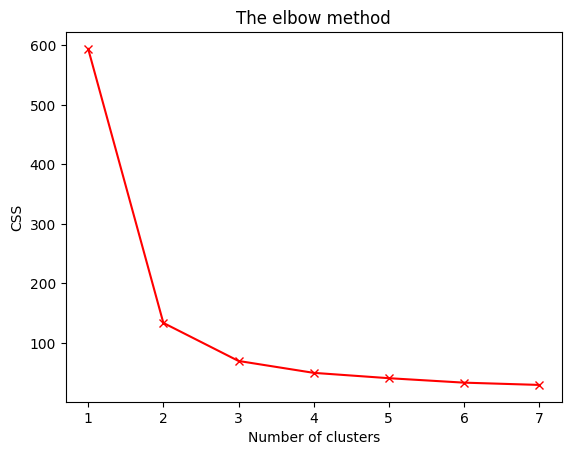

In [5]:
# Settin the data
x=df.iloc[:,0:3].values

css=[]

# Finding inertia on various k values
for i in range(1,8):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)
    
plt.plot(range(1, 8), css, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') 
plt.show()

**From the graph above, we can clearly see that there is three clusters can be fount by the model less than the initial data by one cluster.**

### **initialising the model**

In [6]:
#Applying Kmeans classifier
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)
print("Training complete.")

Training complete.


In [7]:
kmeans.cluster_centers_

array([[5.84655172, 2.73275862, 4.3637931 ],
       [5.006     , 3.418     , 1.464     ],
       [6.83571429, 3.06428571, 5.6547619 ]])

### Plotting the clusters .

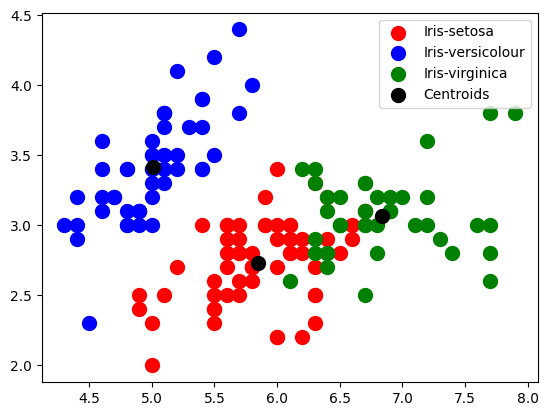

In [8]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()